In [97]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.make_interval_blobs(n_samples=100, n_clusters=3, n_dims = 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0         -6.173779        -4.864568        -9.423790        -5.758781   
1         -7.503138        -6.504491       -11.584092       -10.188500   
2         -6.689782        -6.589782       -10.694020        -7.508775   
3         -6.468758        -5.179815       -13.164620        -8.368284   
4        -11.358443        -7.231472         0.385716         1.802630   
..              ...              ...              ...              ...   
95        -9.820830        -6.347496        -4.115159        -0.235896   
96        -7.952435        -7.150925       -12.078950        -8.403573   
97        -6.333371        -5.918179       -12.943501        -9.610006   
98         7.988693        10.902729        -1.685111         0.813414   
99        -4.605356        -4.006301       -11.636005        -9.373

In [98]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(100, 6)
100


In [99]:


hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[2 2 2 2 1 2 2 0 0 0 1 1 0 2 0 2 1 2 0 0 0 1 1 0 0 1 2 0 1 1 0 2 1 0 1 2 0
 1 2 1 1 2 1 2 1 2 1 1 0 2 1 0 2 2 2 0 1 0 2 2 1 0 1 2 0 0 1 0 1 2 1 0 0 1
 0 1 1 2 2 2 0 0 0 1 0 1 0 1 1 2 1 2 0 2 0 1 2 2 0 2]
{'linkage_matrix': array([[ 25.        ,  28.        ,   0.729729  ,   2.        ],
       [ 68.        ,  83.        ,   0.95570521,   2.        ],
       [ 49.        ,  93.        ,   0.99190467,   2.        ],
       [ 41.        ,  69.        ,   1.04377138,   2.        ],
       [ 35.        ,  58.        ,   1.05286794,   2.        ],
       [  2.        ,  15.        ,   1.05489514,   2.        ],
       [ 27.        ,  72.        ,   1.11771669,   2.        ],
       [ 26.        ,  31.        ,   1.13326836,   2.        ],
       [ 24.        ,  30.        ,   1.14150338,   2.        ],
       [ 57.        ,  98.        ,   1.21303636,   2.        ],
       [ 52.        ,  89.        ,   1.25912818,   2.        ],
       [ 20.        ,  92.        ,   1.32900761,   2.        

Requested clusters: 5, Actual clusters: 5


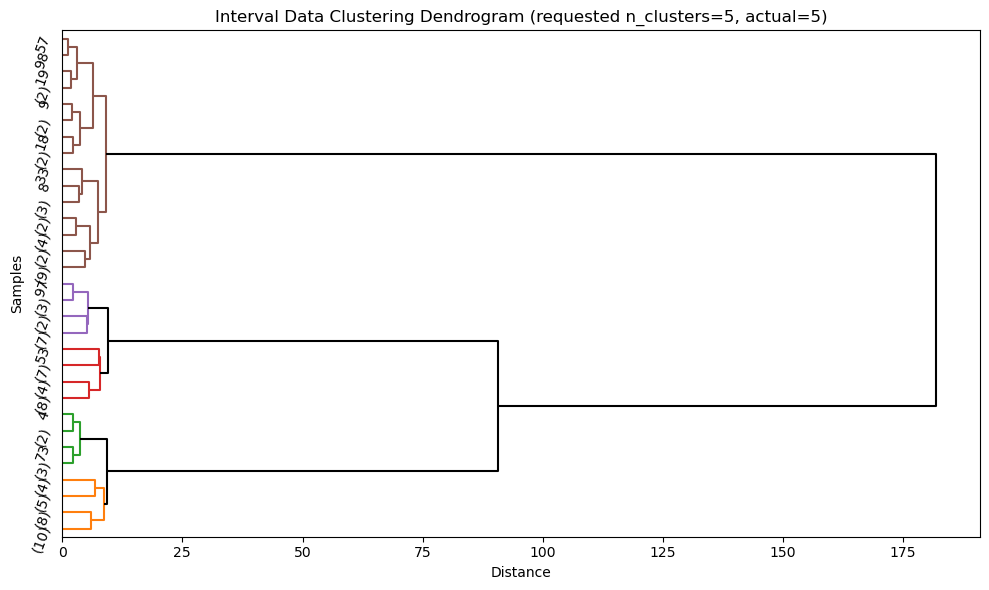

In [100]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='right',
    show_leaf_counts=True
)

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Parallel Coordinates'}>)

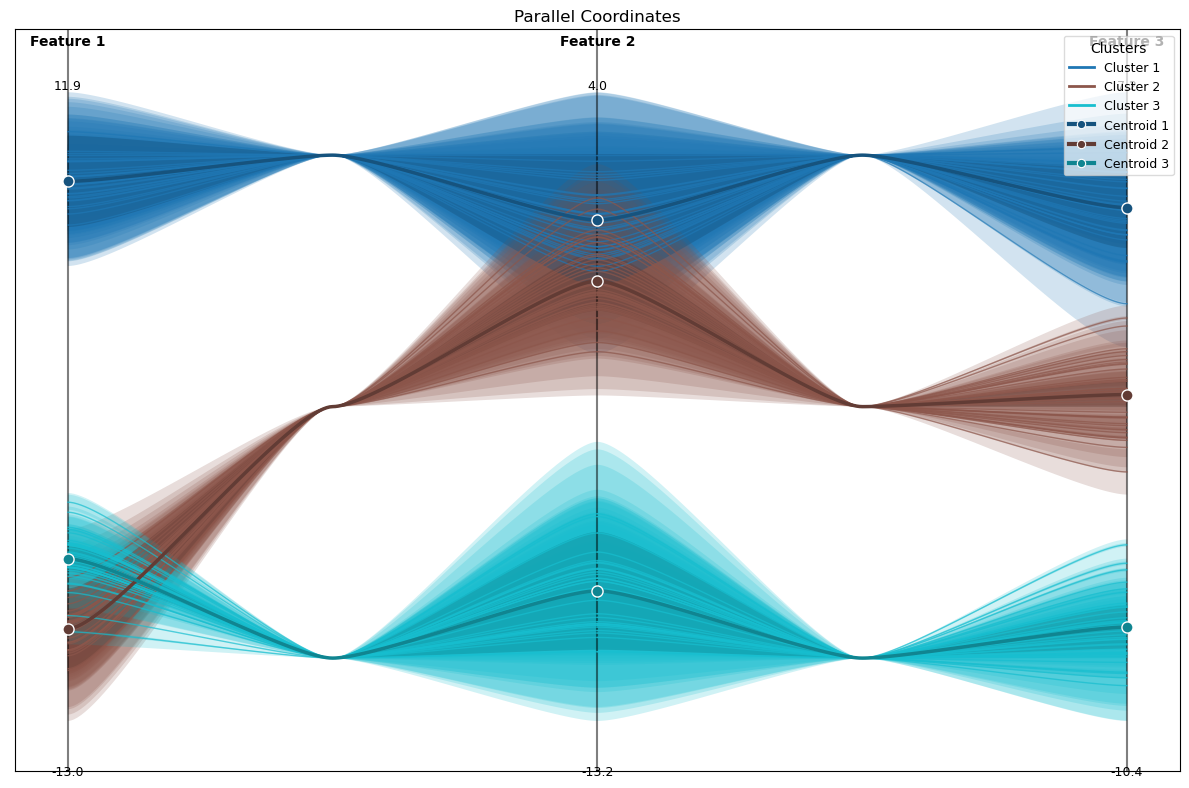

In [105]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


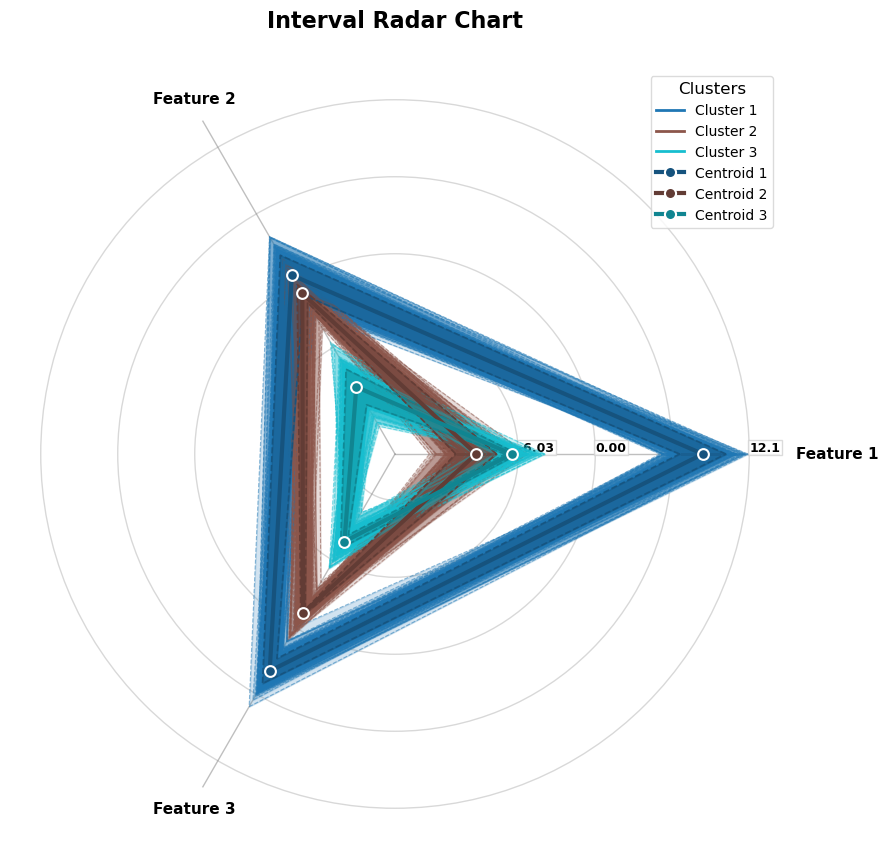

In [102]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

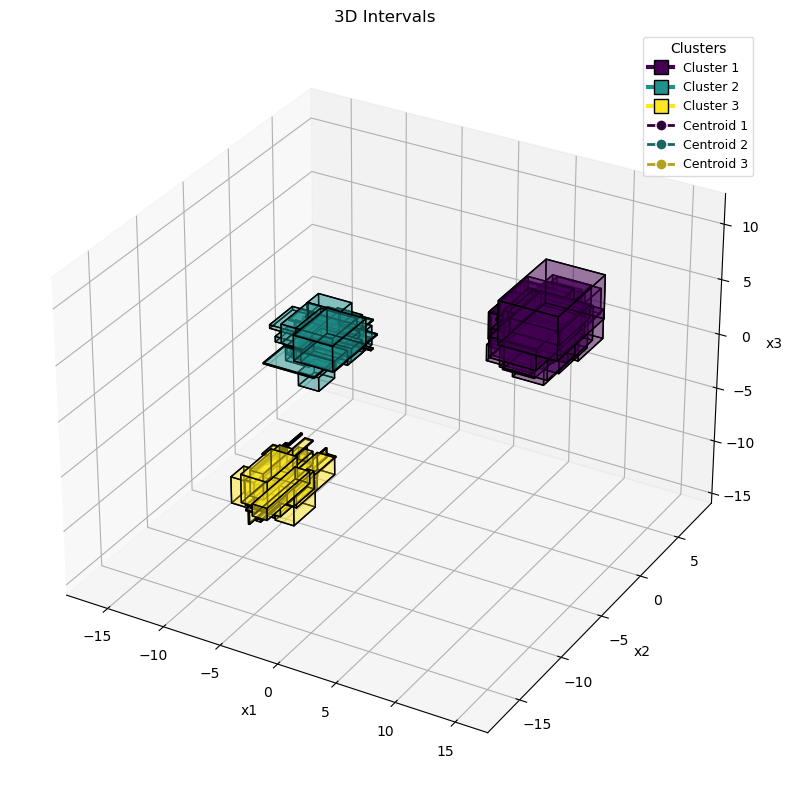

In [103]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)


 Random Interval Data:
    Feature_1_lower  Feature_1_upper
0        -11.067557        -7.804015
1         -5.868004        -5.362400
2         -6.783209        -6.462915
3          5.283932         8.163433
4          3.006457         7.413113
..              ...              ...
95       -10.357668        -6.961881
96       -11.511543        -8.202112
97       -11.362974        -7.770810
98         1.892959         4.364563
99        -5.654954        -4.330959

[100 rows x 2 columns]


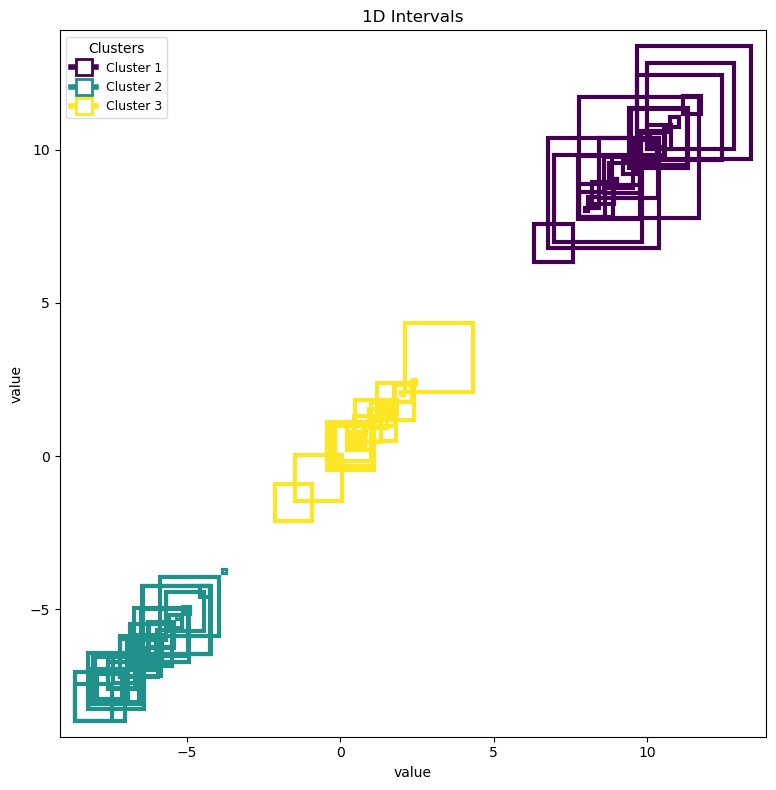

In [118]:

print("\n Random Interval Data:")
print(random_data.data)

random_data = IntervalData.make_interval_blobs(n_samples=100, n_clusters=3, n_dims = 1)

model = IntervalKMeans(n_clusters=3,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

fig, ax = Interval2d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_, fill_intervals=False, title = '1D Intervals')